In [79]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

df = pd.read_csv("/content/mcdonalds.csv")


Preprocessing

In [80]:
# Encoding categorical data

features = ['yummy', 'convenient', 'spicy', 'fattening', 'greasy', 'fast', 'cheap', 'tasty', 'expensive', 'healthy', 'disgusting']

from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()

for i in features:
  df[i] = label_encoder.fit_transform(df[i])

**A.4 Step 4: Exploring Data**

In [81]:
df.head()    # column names along with first few values

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender
0,0,1,0,1,0,1,1,0,1,0,0,-3,61,Every three months,Female
1,1,1,0,1,1,1,1,1,1,0,0,+2,51,Every three months,Female
2,0,1,1,1,1,1,0,1,1,1,0,+1,62,Every three months,Female
3,1,1,0,1,1,1,1,1,0,0,1,+4,69,Once a week,Female
4,0,1,0,1,1,1,1,0,0,1,0,+2,49,Once a month,Male


In [82]:
df.shape    # shape of dataset

(1453, 15)

In [83]:
# Convert mcdonalds subset to a matrix
df2 = pd.read_csv("/content/mcdonalds.csv")
MD_x = np.matrix(df2.iloc[:, 0:11])

# Convert "Yes" values to 1 and others to 0
MD_x = (MD_x == "Yes").astype(int)

# Calculate column means and round to two decimal places
column_means = np.round(np.mean(MD_x, axis=0), 2)

for i in range (11):
  print(column_means[0][i], "of respondnts perceive McDonald's as", features[i])

0.55 of respondnts perceive McDonald's as yummy
0.91 of respondnts perceive McDonald's as convenient
0.09 of respondnts perceive McDonald's as spicy
0.87 of respondnts perceive McDonald's as fattening
0.53 of respondnts perceive McDonald's as greasy
0.9 of respondnts perceive McDonald's as fast
0.6 of respondnts perceive McDonald's as cheap
0.64 of respondnts perceive McDonald's as tasty
0.36 of respondnts perceive McDonald's as expensive
0.2 of respondnts perceive McDonald's as healthy
0.24 of respondnts perceive McDonald's as disgusting


Another way of exploring data initially is to compute a principal components analysis, and create a perceptual map. A perceptual map offers initial insights into how attributes are rated by respondents and, importantly, which attributes tend to be
rated in the same way.

In [84]:
from sklearn.decomposition import PCA
pca = PCA()

df3 = df[['yummy', 'convenient', 'spicy', 'fattening', 'greasy', 'fast', 'cheap', 'tasty', 'expensive', 'healthy', 'disgusting']].copy()

MD_pca = pca.fit_transform(df3)

explained_variance_ratio = pca.explained_variance_ratio_
print("Proportion of Variance Explained:\n", explained_variance_ratio)

Proportion of Variance Explained:
 [0.29944723 0.19279721 0.13304535 0.08309578 0.05948052 0.05029956
 0.0438491  0.03954779 0.0367609  0.03235329 0.02932326]


Results from principal components analysis indicate that the first two components capture about 50% of the information contained in the segmentation variables.

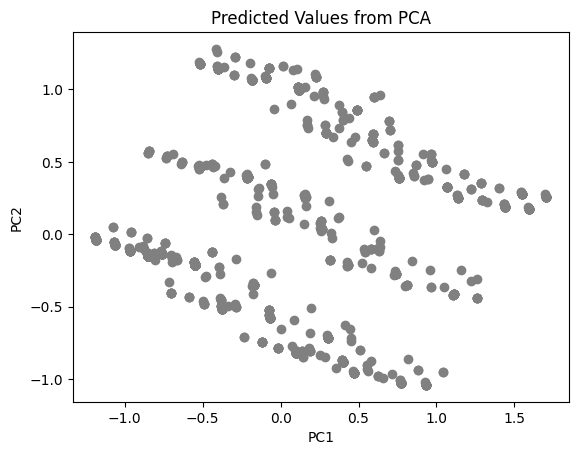

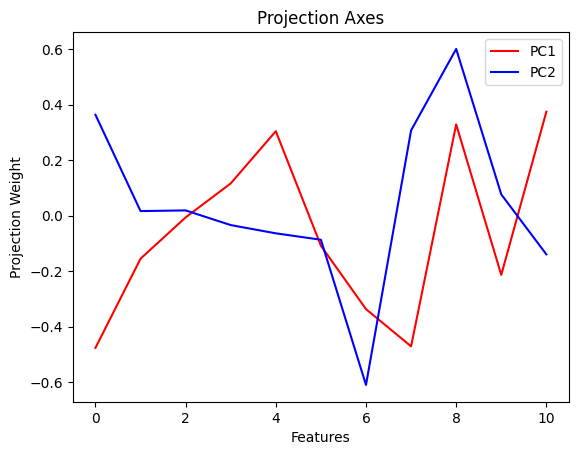

In [85]:
plt.scatter(MD_pca[:, 0], MD_pca[:, 1], color='grey')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('Predicted Values from PCA')
plt.show()

plt.plot(pca.components_[0], color='red', label='PC1')
plt.plot(pca.components_[1], color='blue', label='PC2')
plt.xlabel('Features')
plt.ylabel('Projection Weight')
plt.title('Projection Axes')
plt.legend()
plt.show()

**A.5 Step 5: Extracting Segments**

A.5.1 Using k-Means

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

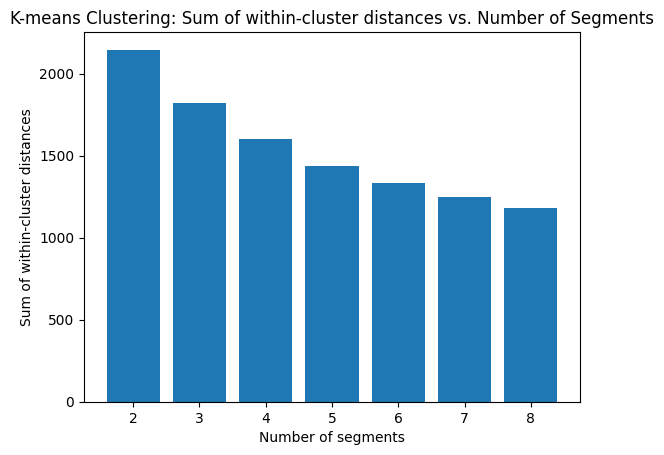

In [91]:
from sklearn.cluster import KMeans

# Initialize variables
k_range = range(2, 9)
within_cluster_distances = []

# Perform K-means clustering for different numbers of segments
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=1234)
    kmeans.fit(df3)
    within_cluster_distances.append(kmeans.inertia_)

# Plot the sum of within-cluster distances vs. the number of segments
plt.bar(k_range, within_cluster_distances)
plt.xlabel('Number of segments')
plt.ylabel('Sum of within-cluster distances')
plt.title('K-means Clustering: Sum of within-cluster distances vs. Number of Segments')
plt.show()


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

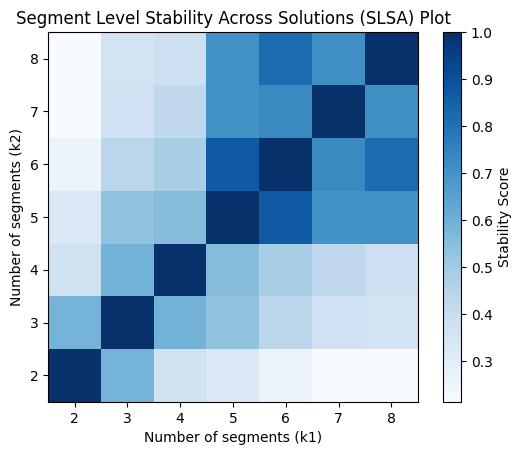

In [92]:
from sklearn.metrics import adjusted_rand_score

mcd_array = np.array(df3)

# Initialize variables
k_range = range(2, 9)
stability_scores = np.zeros((len(k_range), len(k_range)))

# Perform SLSA for different numbers of segments
for i, k1 in enumerate(k_range):
    for j, k2 in enumerate(k_range):
        # Perform clustering with k1 and k2 segments
        kmeans1 = KMeans(n_clusters=k1, random_state=1234)
        kmeans2 = KMeans(n_clusters=k2, random_state=1234)

        # Fit the models and predict the cluster labels
        labels1 = kmeans1.fit_predict(mcd_array)
        labels2 = kmeans2.fit_predict(mcd_array)

        # Calculate the adjusted Rand index as the stability score
        stability_scores[i, j] = adjusted_rand_score(labels1, labels2)

# Create SLSA plot
plt.imshow(stability_scores, origin='lower', cmap='Blues')
plt.colorbar(label='Stability Score')
plt.xticks(ticks=range(len(k_range)), labels=k_range)
plt.yticks(ticks=range(len(k_range)), labels=k_range)
plt.xlabel('Number of segments (k1)')
plt.ylabel('Number of segments (k2)')
plt.title('Segment Level Stability Across Solutions (SLSA) Plot')
plt.show()

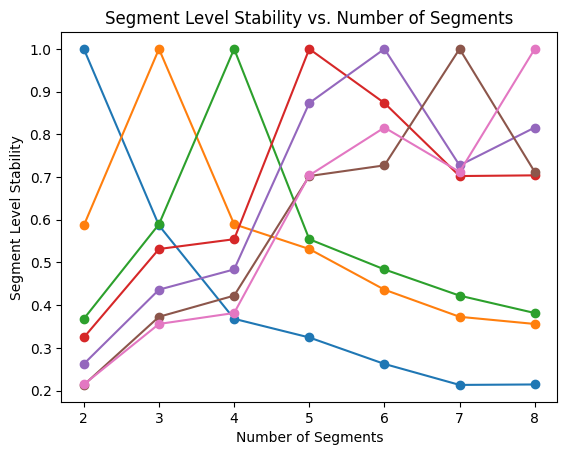

In [93]:
plt.plot(k_range, stability_scores, marker='o')
plt.xlabel('Number of Segments')
plt.ylabel('Segment Level Stability')
plt.title('Segment Level Stability vs. Number of Segments')
plt.show()

**NOTE**

4 segment solution is selected and stored in an object of its own.

A shaded mosiac plot can be generated between this object and different features to analyse segments.